In [1]:
import os
import random
import cv2
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix
import itertools
import keras.backend as K
import yaml
from itertools import combinations

from models import VGG19SiameseNetworkFC_L2
from config import VALID_IMG_NUM, INPUT_SHAPE, DATA_DIR, BATCH_SIZE, \
DEFAULT_LOAD_WEIGHTS, DEFAULT_HARD_SAMPLING_BATCH, DEFAULT_LEARNING_RATE, DEFAULT_MARGIN, \
DEFAULT_TIMESTAMP, DEFAULT_FREEZE_LAYERS, CHECKPOINTS_DIR
from utils.data_generators import TripletDataGenerator
from utils.utils import plot_side_by_side
from fit import TrainingConfigurator
K.set_learning_phase(1)


Using TensorFlow backend.


### TripletDataGenerator

In [2]:
TIMESTAMP = '20190130230939'

with open(os.path.join(CHECKPOINTS_DIR, TIMESTAMP, 'config_{}.yml'.format(TIMESTAMP)), 'r') as cfg_file:
    conf = yaml.load(cfg_file)
train_conf = TrainingConfigurator(conf)



__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            (None, 320, 320, 3)  0                                            
__________________________________________________________________________________________________
block1_conv1 (Conv2D)           (None, 159, 159, 32) 864         input_1[0][0]                    
__________________________________________________________________________________________________
block1_conv1_bn (BatchNormaliza (None, 159, 159, 32) 128         block1_conv1[0][0]               
__________________________________________________________________________________________________
block1_conv1_act (Activation)   (None, 159, 159, 32) 0           block1_conv1_bn[0][0]            
__________________________________________________________________________________________________
block1_con

Weights loaded!
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
ImageA_Input (InputLayer)       (None, 320, 320, 3)  0                                            
__________________________________________________________________________________________________
ImageP_Input (InputLayer)       (None, 320, 320, 3)  0                                            
__________________________________________________________________________________________________
ImageN_Input (InputLayer)       (None, 320, 320, 3)  0                                            
__________________________________________________________________________________________________
encoder (Model)                 (None, 2048)         20861480    ImageA_Input[0][0]               
                                                                 ImageP_Input[0][0]          

In [3]:
data_triplet_generator = TripletDataGenerator(train_conf)

0
254


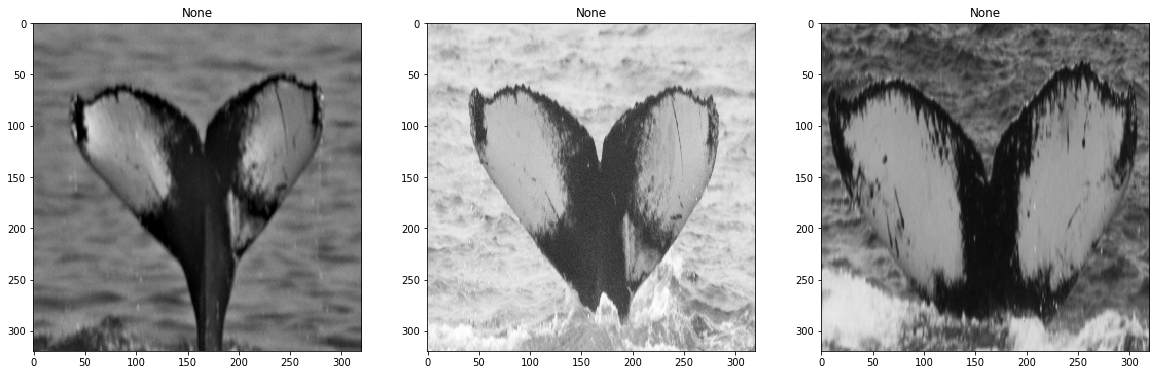

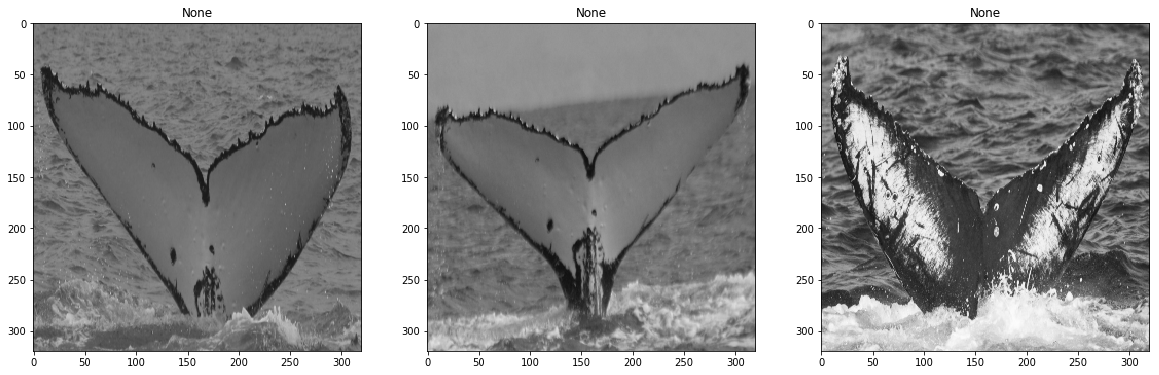

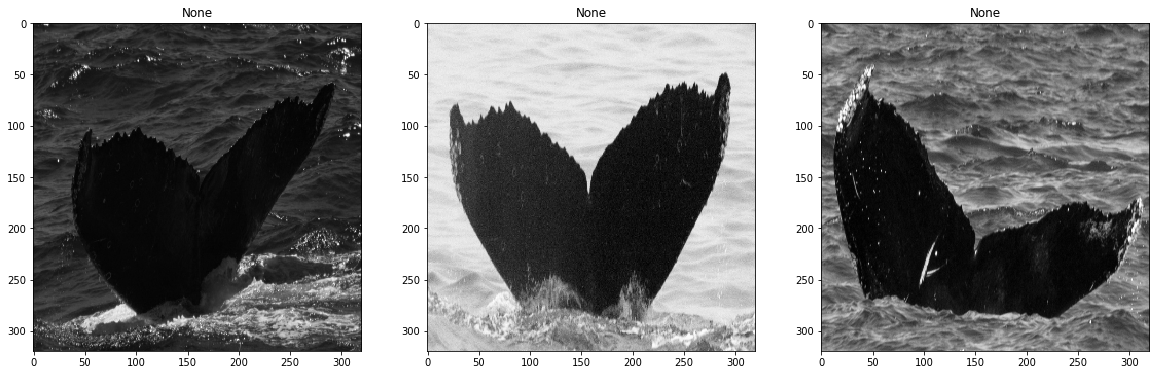

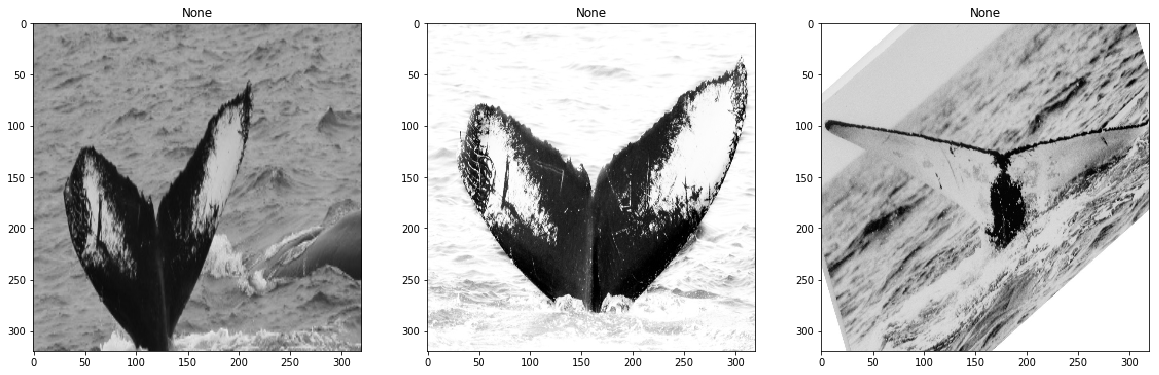

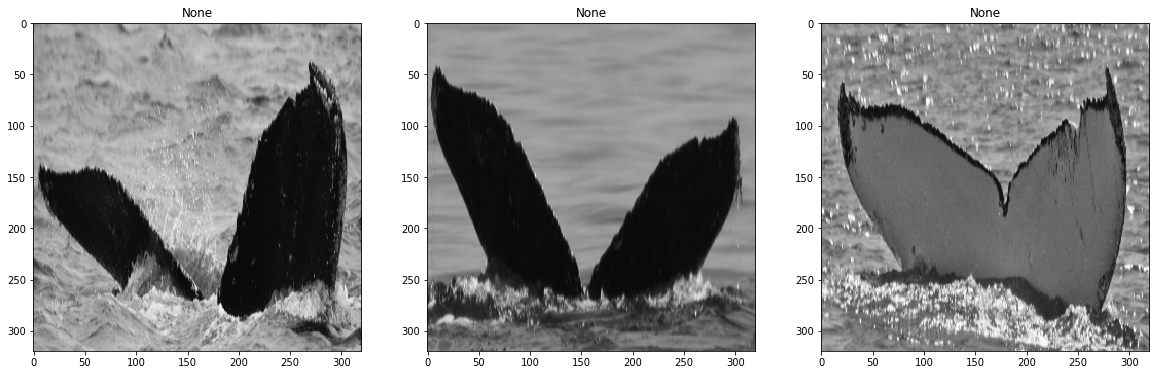

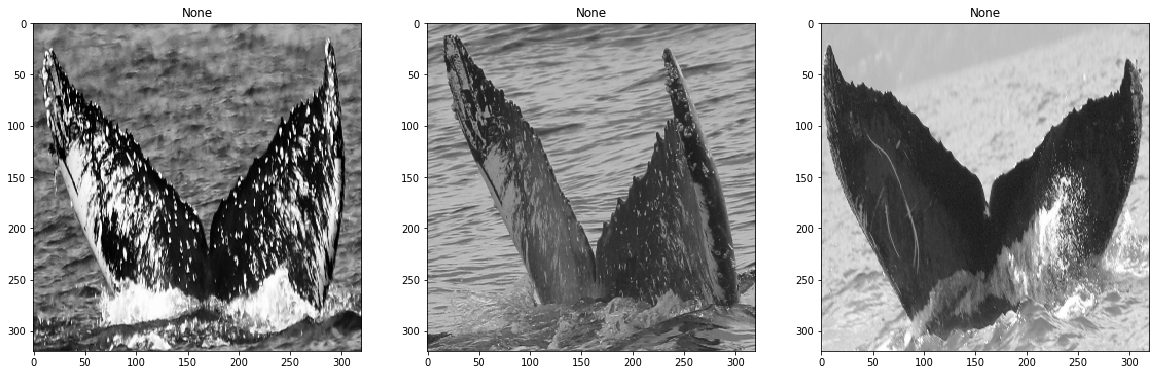

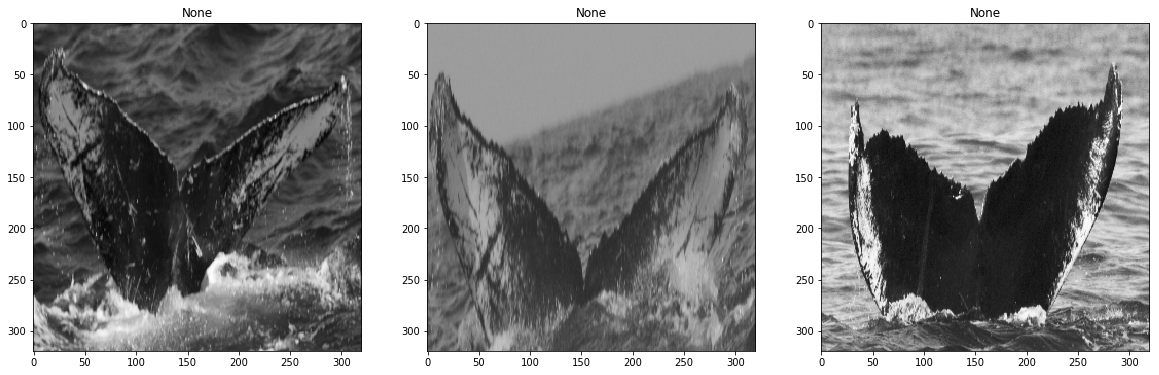

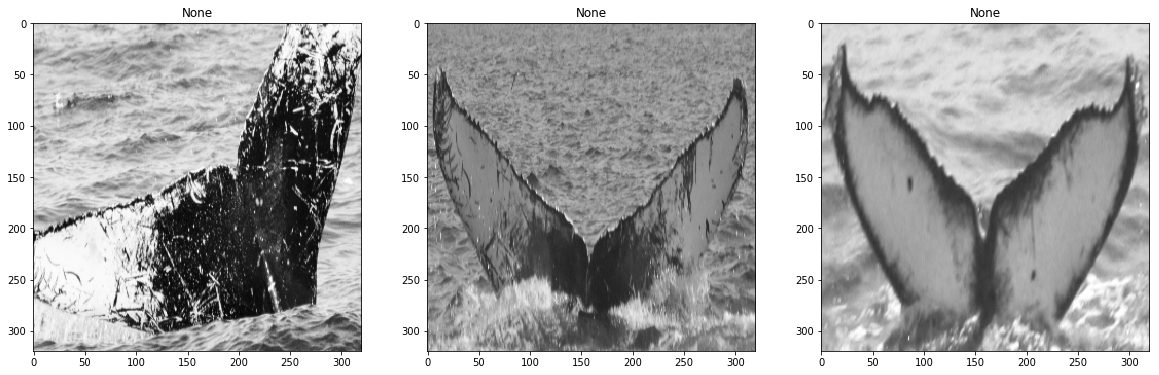

In [4]:
data_gen = data_triplet_generator.make_image_gen()

for (x1, x2, x3), _ in data_gen:
    print(x1.min())
    print(x1.max())
    for i in range(train_conf.batch_size):
        plot_side_by_side([x1[i],x2[i],x3[i]])
    
    break

In [ ]:
data_gen = data_triplet_generator.make_image_gen_hard_batch()

for (x1, x2, x3), _ in data_gen:
    print(x1.min())
    print(x1.max())
    for i in range(train_conf.batch_size):
        plot_side_by_side([x1[i],x2[i],x3[i]])
    
    break

Img P collected: 
Img P collected: 
Img P collected: 
Img P collected: 
Img P collected: 


In [ ]:
data_gen = data_triplet_generator.create_aug_gen(data_triplet_generator.make_image_gen_hard_batch())
for (x1, x2, x3), _ in data_gen:
    print(x1.min())
    print(x1.max())
    for i in range(train_conf.batch_size):
        plot_side_by_side([x1[i],x2[i],x3[i]])
    
    break

In [ ]:
data_gen = data_triplet_generator.get_training_gen()

for (x1, x2,x3), _ in data_gen:
    print(x1.min())
    print(x1.max())
    for i in range(train_conf.batch_size):
        plot_side_by_side([((x1[i]+1)*255/2).astype(np.uint8),
                           ((x2[i]+1)*255/2).astype(np.uint8),
                           ((x3[i]+1)*255/2).astype(np.uint8)])
  
    
    break

In [ ]:
# dataset = data_triplet_generator.get_hard_preprocessed_validation_dataset()
# print(dataset[0][0][0].min())
# print(dataset[0][0][0].max())
# plot_side_by_side([((dataset[0][0][0]+1)*255/2).astype(np.uint8),
#                    ((dataset[0][1][0]+1)*255/2).astype(np.uint8),
#                    ((dataset[0][2][0]+1)*255/2).astype(np.uint8)])

